## Image processing

In [3]:
import numpy as np
import skimage
from skimage import img_as_float
import skimage.filters as skif
from skimage.color import rgb2gray
import skimage.data as skid
import skimage.exposure as skie
from ipywidgets import interact
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [4]:
chelsea = skid.chelsea()

In [5]:
chelsea.shape, chelsea.dtype

((300, 451, 3), dtype('uint8'))

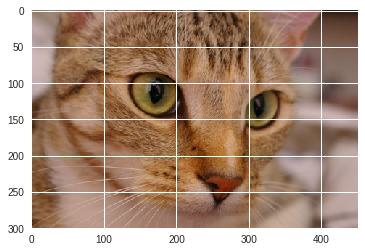

In [9]:
plt.imshow(chelsea)
#plt.axis('off')

In [10]:
img = rgb2gray(chelsea)

In [11]:
img.shape, img.dtype

((300, 451), dtype('float64'))

In [13]:
img

array([[ 0.48523098,  0.48523098,  0.47738784, ...,  0.11692392,
         0.11692392,  0.11692392],
       [ 0.49699569,  0.49307412,  0.48523098, ...,  0.12336824,
         0.1225349 ,  0.1272898 ],
       [ 0.50849255,  0.50457098,  0.49475569, ...,  0.12336039,
         0.12728196,  0.13120353],
       ..., 
       [ 0.24786745,  0.29884784,  0.40501294, ...,  0.58914824,
         0.58914824,  0.58914824],
       [ 0.38173647,  0.42487373,  0.39628392, ...,  0.57403529,
         0.57403529,  0.57795686],
       [ 0.42487373,  0.36883294,  0.36042431, ...,  0.55442745,
         0.55442745,  0.55834902]])

In [14]:
chelsea

array([[[143, 120, 104],
        [143, 120, 104],
        [141, 118, 102],
        ..., 
        [ 45,  27,  13],
        [ 45,  27,  13],
        [ 45,  27,  13]],

       [[146, 123, 107],
        [145, 122, 106],
        [143, 120, 104],
        ..., 
        [ 46,  29,  13],
        [ 45,  29,  13],
        [ 47,  30,  14]],

       [[148, 126, 112],
        [147, 125, 111],
        [146, 122, 109],
        ..., 
        [ 48,  28,  17],
        [ 49,  29,  18],
        [ 50,  30,  19]],

       ..., 
       [[ 92,  58,  30],
        [105,  71,  43],
        [132,  98,  71],
        ..., 
        [172, 145, 138],
        [172, 145, 138],
        [172, 145, 138]],

       [[128,  92,  60],
        [139, 103,  71],
        [134,  95,  64],
        ..., 
        [166, 142, 132],
        [166, 142, 132],
        [167, 143, 133]],

       [[139, 103,  71],
        [127,  88,  57],
        [125,  86,  53],
        ..., 
        [161, 137, 127],
        [161, 137, 127],
        [162, 138,

In [15]:
p2, p98 = np.percentile(img, (2, 98))

In [16]:
img_rescale = skie.rescale_intensity(img, in_range=(p2, p98))

In [17]:
img_eq = skie.equalize_hist(img)

In [18]:
img_adapteq = img_as_float(skie.equalize_adapthist(img, clip_limit=0.03))

/home/jeong/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [19]:
hist_types = dict([('Contrast stretching', img_rescale),
                   ('Histogram equalization', img_eq),
                   ('Adaptive equalization', img_adapteq)])

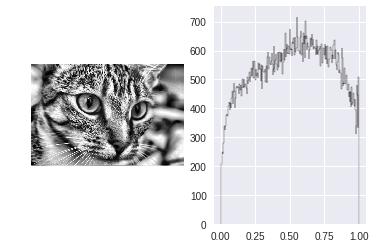

In [20]:
@interact(hist_type=list(hist_types.keys()))
def display_result(hist_type):
    result = hist_types[hist_type]

    # We display the processed grayscale image on the left.
    plt.subplot(121)
    plt.imshow(result, cmap='gray')
    plt.axis('off')

    # We display the histogram on the right.
    plt.subplot(122)
    plt.hist(result.ravel(), bins=np.linspace(0., 1., 256),
             histtype='step', color='black')

    plt.show()